In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('hr_data.csv')

print(df.head())

print(df.isnull().sum())

   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...

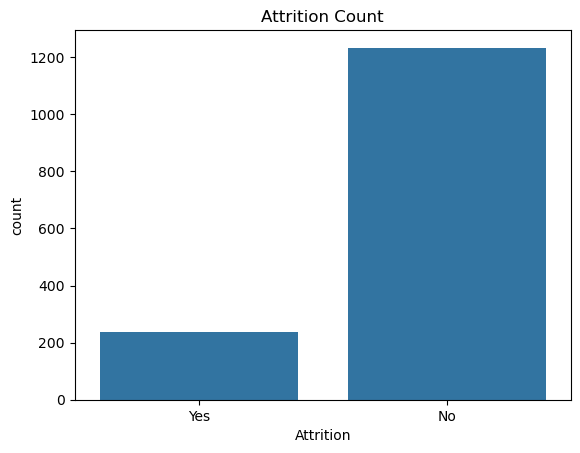

In [14]:
sns.countplot(x='Attrition', data=df)
plt.title("Attrition Count")
plt.show()

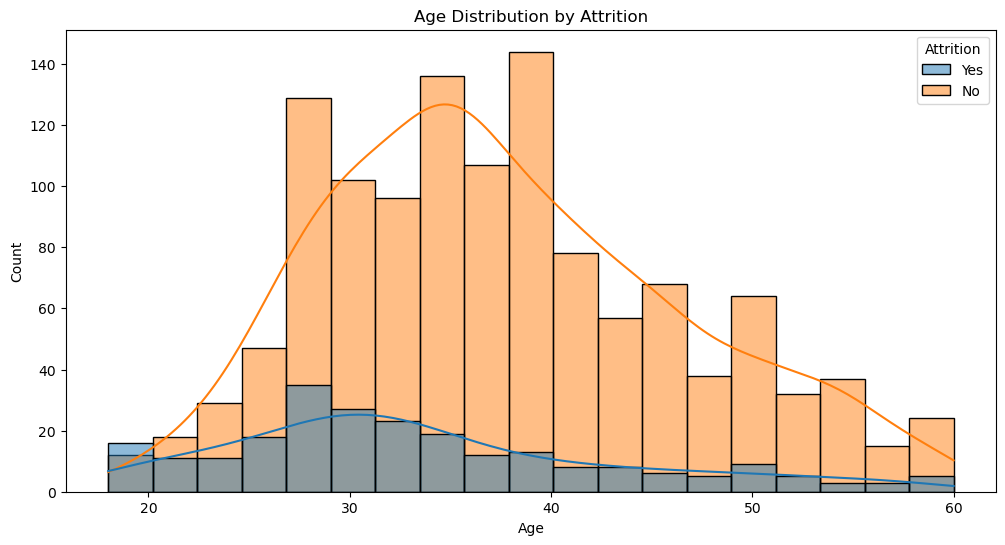

In [4]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Age', hue='Attrition', kde=True)
plt.title("Age Distribution by Attrition")
plt.show()

In [15]:
from sklearn.preprocessing import LabelEncoder

# Create a copy of the dataframe for the model
df_model = df.copy()

# Convert 'Attrition' (Yes/No) to 1/0
df_model['Attrition'] = df_model['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

# Convert other text columns (Categorical variables) to numbers
for column in df_model.columns:
    if df_model[column].dtype == 'object':
        le = LabelEncoder()
        df_model[column] = le.fit_transform(df_model[column])

print(df_model.head())

   Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0   41          1               2       1102           2                 1   
1   49          0               1        279           1                 8   
2   37          1               2       1373           1                 2   
3   33          0               1       1392           1                 3   
4   27          0               2        591           1                 2   

   Education  EducationField  EmployeeCount  EmployeeNumber  ...  \
0          2               1              1               1  ...   
1          1               1              1               2  ...   
2          2               4              1               4  ...   
3          4               1              1               5  ...   
4          1               3              1               7  ...   

   RelationshipSatisfaction  StandardHours  StockOptionLevel  \
0                         1             80                

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler # <--- New Tool

X = df_model.drop('Attrition', axis=1)
y = df_model['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()


X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(max_iter=500) 
model.fit(X_train_scaled, y_train)

predictions = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, predictions)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))


Model Accuracy: 89.12%
Confusion Matrix:
[[249   6]
 [ 26  13]]


In [17]:

df_model.to_csv('hr_data_processed.csv', index=False)
print("File saved for Power BI!")

File saved for Power BI!


In [18]:
import os
print("Your file is saved here:")
print(os.getcwd())

Your file is saved here:
C:\Users\Admin\Desktop\da project


In [19]:
# Replace the path below with exactly what you copied
# The 'r' tells Python to treat the backslashes correctly

save_path = r"C:\Users\Admin\OneDrive\Desktop\da project\hr_data_processed.csv"

df_model.to_csv(save_path, index=False)

print(f"File successfully force-saved to: {save_path}")

File successfully force-saved to: C:\Users\Admin\OneDrive\Desktop\da project\hr_data_processed.csv
